# Stochastic Simulation Assignment 3

Created on 08-12-2021 18:19

Author: Florian Tiggeloven

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import copy
from scipy import stats

In [47]:
class city:
    """"Make a class instant for all cities with corresponding coordinates"""
    def __init__(self,number,coords):
        self.number = number+1
        self.x = coords['x'][number]
        self.y = coords['y'][number]

class Sim_Anneal:
    """Make a class instant for simmulated annealing of a map with cities"""
    def __init__(self, coords, T, alpha, cooling):
        self.coords = coords
        self.cities = []
        self.distance = 10**8
        self.T0 = T
        self.T = T
        self.alpha = alpha
        self.cooling = cooling
        self.k=1
        self.chain = 0


    def initial_plane(self):
        """set initial plane with cities, lines between cities is randomly chosen"""
        for i in range(len(self.coords)):
            self.cities.append(city(i,self.coords))
        random.shuffle(self.cities)
        self.distance = self.get_total_distance(self.cities)


    def update_plane(self, iter):
        """per iteration update the plane with cities and update lines between city using random 2-OPT"""
        copy_list = copy.deepcopy(self.cities)
        a = 2
        b = 1
        while a >= b: # get random indicies of city list
            a = np.random.randint(0,len(self.cities))
            b = np.random.randint(0,len(self.cities))
        templist = self.cities[a:b]  # create sub-list
        templist.reverse()  # reverse sub-list
        copy_list[a:b] = templist  # import reversed sub-list into copy of original
        temp_distance = self.get_total_distance(copy_list)
        self.C = self.chance(temp_distance)
        
        if temp_distance < self.distance:  # if new map has shorter total distance, accept with p=1
            self.cities[a:b] = templist
            self.distance = temp_distance
            self.update_cooling(iter)   
        elif np.random.random() < self.chance(temp_distance): # new map worse -> accept with p dependent on T
            self.cities[a:b] = templist
            self.distance = temp_distance
            self.update_cooling(iter)
            


    def chance(self, temp_distance):
        """calculate the chance that a new map with bigger distance is accepted"""
        return np.exp(-(abs(temp_distance-self.distance))/self.T)
        

    def update_cooling(self, iter):
        """Update temperature according to cooling schedule"""
        # if iter%50 == 0:
        #     self.k+=1
        self.k+=0.02
        if self.cooling == "exponential":
            self.T = self.T0*self.alpha**(self.k)
        elif self.cooling == "linear":
            self.T = self.T0/(1+self.alpha*self.k)
        elif self.cooling == "quadratic":
            self.T = self.T0/(1+self.alpha*self.k**2)


    def get_distance(self, a, b):
        """Calculate distance between two cities"""
        return np.sqrt((a.x-b.x)**2+(a.y-b.y)**2)


    def get_total_distance(self, lijst):
        """Calculate the total distance --> to be optimized"""
        dis = 0
        for i in range(len(lijst)):
            if i < len(lijst)-1:
                dis = dis + self.get_distance(lijst[i], lijst[i+1])
        total_dis = dis + self.get_distance(lijst[len(lijst)-1],lijst[0])

        return total_dis

        
    def plot(self):
        """plot the map (cities + lines)"""
        x, y = [], []
        for city in self.cities:
            x.append(city.x)
            y.append(city.y)
        plt.plot(x,y, 'b-')
        plt.plot(x,y, 'r.')
        plt.show()


# get data
cor_data = pd.read_csv('a280.tsp.txt',skiprows=6,sep=r'\s{1,}',names=['nr','x','y'] ,engine='python')
cor_data = cor_data[0:51]

# stochastic parameters
N_iterations = 10000
N_runs = 10


# empty data frames  to be updated
dis_expo_1 = np.ones((N_iterations, N_runs))
dis_expo_3 = np.ones((N_iterations, N_runs))
dis_expo_5 = np.ones((N_iterations, N_runs))

dis_lin_1 = np.ones((N_iterations, N_runs))
dis_lin_3 = np.ones((N_iterations, N_runs))
dis_lin_5 = np.ones((N_iterations, N_runs))

dis_quad_1 = np.ones((N_iterations, N_runs))
dis_quad_3 = np.ones((N_iterations, N_runs))
dis_quad_5 = np.ones((N_iterations, N_runs))

# empty data frames to be updated
texpo_1 = np.ones((N_iterations, N_runs))
texpo_3 = np.ones((N_iterations, N_runs))
texpo_5 = np.ones((N_iterations, N_runs))

tlin_1 = np.ones((N_iterations, N_runs))
tlin_3 = np.ones((N_iterations, N_runs))
tlin_5 = np.ones((N_iterations, N_runs))

tquad_1 = np.ones((N_iterations, N_runs))
tquad_3 = np.ones((N_iterations, N_runs))
tquad_5 = np.ones((N_iterations, N_runs))


# cooling schedule parameters
T_expo = 18000
alpha_expo = 0.95
T_lin = 18000
alpha_lin = 0.125
T_quad = 18000
alpha_quad = 0.005

# make an instant for given data and cooling schedule
Sim_expo_1 = Sim_Anneal(cor_data, T_expo, alpha_expo, "exponential")
Sim_expo_3 = Sim_Anneal(cor_data, T_expo, alpha_expo, "exponential")
Sim_expo_5 = Sim_Anneal(cor_data, T_expo, alpha_expo, "exponential")

Sim_lin_1 = Sim_Anneal(cor_data, T_lin, alpha_lin, "linear")
Sim_lin_3 = Sim_Anneal(cor_data, T_lin, alpha_lin, "linear")
Sim_lin_5 = Sim_Anneal(cor_data, T_lin, alpha_lin, "linear")

Sim_quad_1 = Sim_Anneal(cor_data, T_quad, alpha_quad, "quadratic")
Sim_quad_3 = Sim_Anneal(cor_data, T_quad, alpha_quad, "quadratic")
Sim_quad_5 = Sim_Anneal(cor_data, T_quad, alpha_quad, "quadratic")

for j in range(N_runs):  # due to stochasticity perform multiple runs
    print(f"you're at run: {j}")
    # set initial random map
    Sim_expo_1.initial_plane()
    Sim_expo_3.initial_plane()
    Sim_expo_5.initial_plane()

    Sim_lin_1.initial_plane()
    Sim_lin_3.initial_plane()
    Sim_lin_5.initial_plane()

    Sim_quad_1.initial_plane()
    Sim_quad_3.initial_plane()
    Sim_quad_5.initial_plane()

    for i in range(N_iterations):
        # update according to random 2-OPT
        Sim_expo_1.update_plane(i)
        Sim_lin_1.update_plane(i)
        Sim_quad_1.update_plane(i)
        # save total distance
        dis_expo_1[i, j] = Sim_expo_1.distance
        dis_lin_1[i, j] = Sim_lin_1.distance
        dis_quad_1[i, j] = Sim_quad_1.distance
        # save T
        texpo_1[i,j] = Sim_expo_1.T
        tlin_1[i,j] = Sim_lin_1.T
        tquad_1[i,j] = Sim_quad_1.T
        for b in range(3):
            Sim_expo_3.update_plane(i)
            Sim_lin_3.update_plane(i)
            Sim_quad_3.update_plane(i)
            # save total distance
            dis_expo_3[i, j] = Sim_expo_3.distance
            dis_lin_3[i, j] = Sim_lin_3.distance
            dis_quad_3[i, j] = Sim_quad_3.distance
        # save T
        texpo_3[i,j] = Sim_expo_3.T
        tlin_3[i,j] = Sim_lin_3.T
        tquad_3[i,j] = Sim_quad_3.T
        for k in range(5):
            Sim_expo_5.update_plane(i)
            Sim_lin_5.update_plane(i)
            Sim_quad_5.update_plane(i)
            # save total distance
            dis_expo_5[i, j] = Sim_expo_5.distance
            dis_lin_5[i, j] = Sim_lin_5.distance
            dis_quad_5[i, j] = Sim_quad_5.distance
        # save T
        texpo_5[i,j] = Sim_expo_5.T
        tlin_5[i,j] = Sim_lin_5.T
        tquad_5[i,j] = Sim_quad_5.T

# calculate mean over N runs
data_expo_1 = np.mean(dis_expo_1, axis=1)
data_expo_3 = np.mean(dis_expo_3, axis=1)
data_expo_5 = np.mean(dis_expo_5, axis=1)


data_lin_1 = np.mean(dis_lin_1, axis=1)
data_lin_3 = np.mean(dis_lin_3, axis=1)
data_lin_5 = np.mean(dis_lin_5, axis=1)

data_quad_1 = np.mean(dis_quad_1, axis=1)
data_quad_3 = np.mean(dis_quad_3, axis=1)
data_quad_5 = np.mean(dis_quad_5, axis=1)


# calculate mean over N runs
t_expo_1 = np.mean(texpo_1, axis=1)
t_expo_3 = np.mean(texpo_3, axis=1)
t_expo_5 = np.mean(texpo_5, axis=1)

t_lin_1 = np.mean(tlin_1, axis=1)
t_lin_3 = np.mean(tlin_3, axis=1)
t_lin_5 = np.mean(tlin_5, axis=1)

t_quad_1 = np.mean(tquad_1, axis=1)
t_quad_3 = np.mean(tquad_3, axis=1)
t_quad_5 = np.mean(tquad_5, axis=1)


# chain length over N runs
# expo_chain = np.sum(np.split(np.array(Sim_expo.chainlist),N_runs),axis=0)
# lin_chain = np.sum(np.split(np.array(Sim_lin.chainlist),N_runs),axis=0)
# quad_chain = np.sum(np.split(np.array(Sim_quad.chainlist),N_runs),axis=0)



you're at run: 0
you're at run: 1
you're at run: 2
you're at run: 3
you're at run: 4
you're at run: 5
you're at run: 6
you're at run: 7
you're at run: 8
you're at run: 9


In [45]:
# standard deviation of all means
x = np.arange(0,len(dis_expo_1),1)
expo_err, lin_err, quad_err = [],[],[]
for i in range(len(dis_expo_1)):
    expo_err.append(np.std(dis_expo_1[i][:]))
    lin_err.append(np.std(dis_lin_1[i][:]))
    quad_err.append(np.std(dis_quad_1[i][:]))

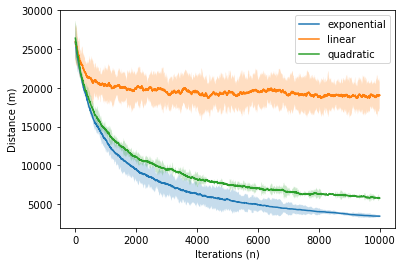

In [54]:
# visualizing total distance
plt.figure()
plt.plot(data_expo_1, label="exponential")
plt.fill_between(x,(np.array(data_expo_1)-np.array(expo_err)),(np.array(data_expo_1)+np.array(expo_err)),alpha=0.25)
plt.plot(data_lin_1, label="linear")
plt.fill_between(x,(np.array(data_lin_1)-np.array(lin_err)),(np.array(data_lin_1)+np.array(lin_err)),alpha=0.25)
plt.plot(data_quad_1, label="quadratic")
plt.fill_between(x,(np.array(data_quad_1)-np.array(quad_err)),(np.array(data_quad_1)+np.array(quad_err)),alpha=0.25)
plt.xlabel("Iterations (n)")
plt.ylabel("Distance (m)")
plt.legend()
plt.savefig("Iterations.png")
plt.show()


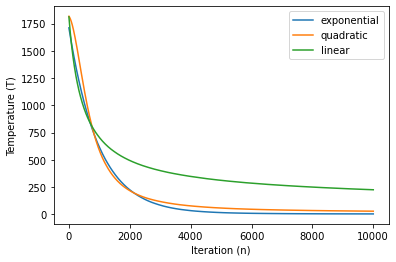

In [49]:
"""Plotting the used cooling schedules"""

plt.figure()
plt.plot(t_expo_1, label="exponential")
plt.plot(t_quad_1, label="quadratic")
plt.plot(t_lin_1, label="linear")
plt.xlabel("Iteration (n)")
plt.ylabel("Temperature (T)")
plt.legend()
plt.savefig("CoolingSc.png")
plt.show()

    

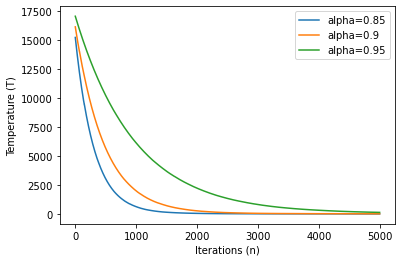

In [50]:
"""Comparing the exponential T distribution for different alpha's"""


cor_data = pd.read_csv('a280.tsp.txt',skiprows=6,sep=r'\s{1,}',names=['nr','x','y'] ,engine='python')

cor_data = cor_data[0:51]

N_iterations = 5000
list_alpha_expo = [0.85, 0.9, 0.95]
texpo = np.ones((N_iterations, len(list_alpha_expo)))

plt.figure()
for k, alpha_expo in enumerate(list_alpha_expo):
    T_expo = 18000
    Sim_expo=Sim_Anneal(cor_data, T_expo, alpha_expo, "exponential")
    Sim_expo.initial_plane()
    for i in range(N_iterations):
        Sim_expo.update_plane(i)
        texpo[i,k] = Sim_expo.T
    plt.plot(texpo[:,k], label=f"alpha={alpha_expo}")


plt.legend()
plt.xlabel("Iterations (n)")
plt.ylabel("Temperature (T)")
plt.savefig("ExpDis.png")
plt.show()



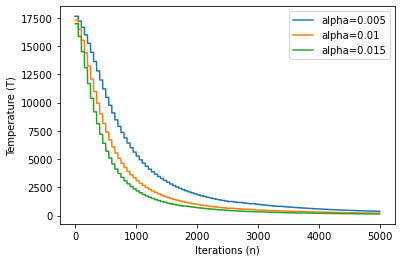

In [21]:
"""Comparing the quadratic T distribution for different alpha's"""

cor_data = pd.read_csv('a280.tsp.txt',skiprows=6,sep=r'\s{1,}',names=['nr','x','y'] ,engine='python')

cor_data = cor_data[0:51]

N_iterations = 5000
list_alpha_quad = [0.005, 0.01, 0.015]
tquad = np.ones((N_iterations, len(list_alpha_quad)))

plt.figure()
for k, alpha_quad in enumerate(list_alpha_quad):
    T_quad = 18000
    Sim_quad=Sim_Anneal(cor_data, T_quad, alpha_quad, "quadratic")
    Sim_quad.initial_plane()
    for i in range(N_iterations):
        Sim_quad.update_plane(i)
        tquad[i,k] = Sim_quad.T
    plt.plot(tquad[:,k], label=f"alpha={alpha_quad}")


plt.legend()
plt.xlabel("Iterations (n)")
plt.ylabel("Temperature (T)")
#plt.savefig("QuadDis.png")
plt.show()




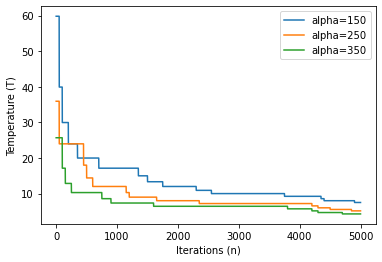

In [22]:
"""Comparing the linear T distribution for different alpha's"""


cor_data = pd.read_csv('a280.tsp.txt',skiprows=6,sep=r'\s{1,}',names=['nr','x','y'] ,engine='python')

cor_data = cor_data[0:51]

N_iterations = 5000
list_alpha_lin = [150, 250, 350]
tlin = np.ones((N_iterations, len(list_alpha_lin)))

plt.figure()
for k, alpha_lin in enumerate(list_alpha_lin):
    T_lin = 18000
    Sim_lin=Sim_Anneal(cor_data, T_lin, alpha_lin, "linear")
    Sim_lin.initial_plane()
    for i in range(N_iterations):
        Sim_lin.update_plane(i)
        tlin[i,k] = Sim_lin.T
    plt.plot(tlin[:,k], label=f"alpha={alpha_lin}")


plt.legend()
plt.xlabel("Iterations (n)")
plt.ylabel("Temperature (T)")
#plt.savefig("linDis.png")
plt.show()





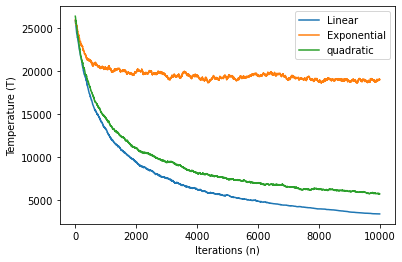

In [55]:
# # # visualizing Markov Chain Length
plt.figure()
plt.plot(data_expo_1, label="Linear")
plt.plot(data_lin_1, label = 'Exponential')
plt.plot(data_quad_1, label="quadratic")
plt.xlabel("Iterations (n)")
plt.ylabel("Temperature (T)")
plt.legend()
plt.savefig("Mchain.png")
plt.show()

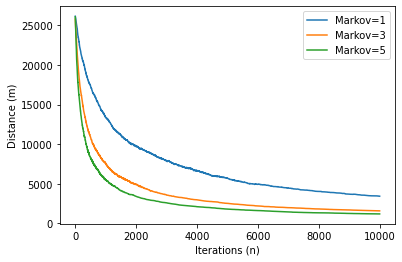

In [24]:
# visualizing total distance
plt.figure()
plt.plot(data_expo_1, label="Markov=1")

plt.plot(data_expo_3, label="Markov=3")

plt.plot(data_expo_5, label="Markov=5")

plt.xlabel("Iterations (n)")
plt.ylabel("Distance (m)")
plt.legend()
#plt.savefig("markovexp.png")
plt.show()

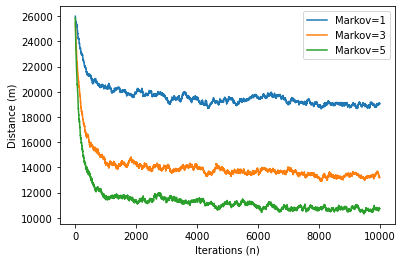

In [52]:
plt.figure()
plt.plot(data_lin_1, label="Markov=1")

plt.plot(data_lin_3, label="Markov=3")

plt.plot(data_lin_5, label="Markov=5")

plt.xlabel("Iterations (n)")
plt.ylabel("Distance (m)")
plt.legend()
plt.savefig("markovlin.png")
plt.show()

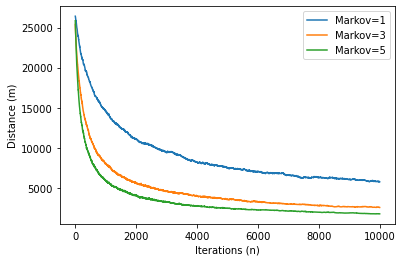

In [53]:
plt.figure()
plt.plot(data_quad_1, label="Markov=1")

plt.plot(data_quad_3, label="Markov=3")

plt.plot(data_quad_5, label="Markov=5")

plt.xlabel("Iterations (n)")
plt.ylabel("Distance (m)")
plt.legend()
plt.savefig('Markovquad.png')
plt.show()